In [6]:
import matplotlib.pyplot as plt
import random
from dataclasses import dataclass

@dataclass
class Instance:
    x = None
    y = None
    
def fuzz(k):
    return random.gauss(0,1) * k

def make_data(centers, n=100, k=0.7):
    data = []
    for x, y in centers:
        for _ in range(n):
            instance = Instance()
            instance.x = x + fuzz(k)
            instance.y = y + fuzz(k)
            data.append(instance)
    return data

def distance(i1, i2):
    return (sum([(i1.x - i2.x)**2, (i1.y - i2.y)**2]))**0.5

def vector_mean(vs):
    result = Instance()
    result.x = sum([v.x for v in vs])/len(vs)
    result.y = sum([v.y for v in vs])/len(vs)
    return result

class KMeans:
    def __init__(self, k):
        self.k = k
        self.means = None
    def classify(self, instance):
        return min(range(self.k), key=lambda i: distance(self.means[i], instance))
    def train(self, data):
        self.means = random.sample(data, k=self.k)
        assignments = None
        while True:
            new_assignments = list(map(self.classify, data))
            if assignments == new_assignments:
                return
            assignments = new_assignments
            for i in range(self.k):
                clust_i = [instance for label, instance in zip(assignments, data) if label == i]
                if clust_i:
                    self.means[i] = vector_mean(clust_i)
                    

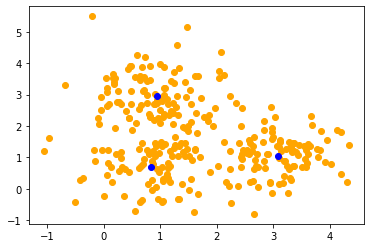

In [7]:
centers = [(1,1), (3,1), (1,3)]
data = make_data(centers)
clust = KMeans(3)
clust.train(data)
plt.scatter([i.x for i in data], [i.y for i in data], color='orange')
plt.scatter([clust.means[i].x for i in range(3)], [clust.means[i].y for i in range(3)], color='blue');